# 5.2

The _Euler-Maclaurin formula_ for the trapezoidal integral approximation method is the approximation error
$\epsilon = \frac{1}{12} h^2 [f'(a) - f'(b)]$  

In addition to the approximation error we have the rounding error which is C times the integral value, with C being $10^{-16}$.

Since the approximation error decreases as 'h' decreases we can decrease our error by increasing the number of slices taken (since 'h' is the slice width).

Looking at the limit as to when our approximation error is no longer the dominant error we can solve for a good 'h' value:  
$h \approx \sqrt{\frac{12 \int^b_a f(x) \ dx}{f'(a) - f'(b)} C}$  
or since $h = (b - a) / N$:  
$N \approx (b - a) \sqrt{\frac{f'(a) - f'(b)}{12 \ C \int^b_a f(x) \ dx}}$

Assuming all but C are of order unity, then $N \approx 10^8$ is the point where we reach the the maximum precision for the machine. Since this is a large value for N it is typically best to use a more precise method like the Simpson's method for better accuracy with a smaller N value.

The _Euler-Maclaurin formula_ for the Simpson's integral approximation method is the approximation error
$\epsilon = \frac{1}{90} h^4 [f'''(a) - f'''(b)]$  

This results in a precision for N being around  
$N \approx (b - a) \sqrt[4]{\frac{f'''(a) - f'''(b)}{90 \ C \int^b_a f(x) \ dx}}$

Looking again at a situation where the leading factors are of order unity then N need be only around 10,000.

In the event of the case we do not know the closed-form expression for the integrand f(x) then if $I$ is the true value of our integral, $h_1 = (b - a) / N_1$, $N_2 = 2N_1$, $h_2=(b-a)/N_2=\frac{1}{2}h_1$, then  
$\epsilon = \frac{1}{3} (I_2 - I_1)$  
for the trapezoidal approximation.

$\epsilon = \frac{1}{15} (I_2 - I_1)$  
for the Simpson's approximation.

# 5.3

Generalizing the errors to looking at doubling the N-values in each calculation we get  
$\epsilon_1 = \frac{1}{3} (I_i - I_{i-1})$ (1)  
for the ith time doubling N.

For the trapezoidal approximation  
$I_i = \frac{1}{2} I_{i-1} + h_i \sum_{k \ odd \ 1 \dots N_i - 1} f (a + kh_i)$ (2)

We can increase our approximation without having to recalculate half of our new points by

    1) Choose an initial N. Calculate the first approximation based upon this N.
    2) Double the number of steps and use equation (2) to determine an improved estimate of the integral. Then use eqaution (1) to calculate the error.
    3) Repeat step 2 until the absolute value of the error is less than the desired value.
 
For the Simpson's approximation we define  
$S_i = \frac{1}{3} \big [ f(a) + f(b) + 2 \sum_{k \ even \ 2 \dots N_i - 2} f (a + kh_i) \big ]$  
$T_i = \frac{2}{3} \sum_{k \ odd \ 1 \dots N_i - 1} f(a + kh_i)$

So  
$S_i = S_{i - 1} + T_{i - 1}$  
and  
I_i = h_i (S_i + 2T_i)$

Then to calculate a desired accuracy:

    1) Choose initial N, and calculate $S_1$, $T_1$, and $I_1$.  
    2) Double N and calculate the new S, T, I, and $\epsilon$ values.
    3) Repeat step 2 until the accuracy is the desire amount.

## Exercise 5.1

Total Distance Traveled (by calculation): 8.556232
Final position (by distanceTraveled[100]): 8.387578


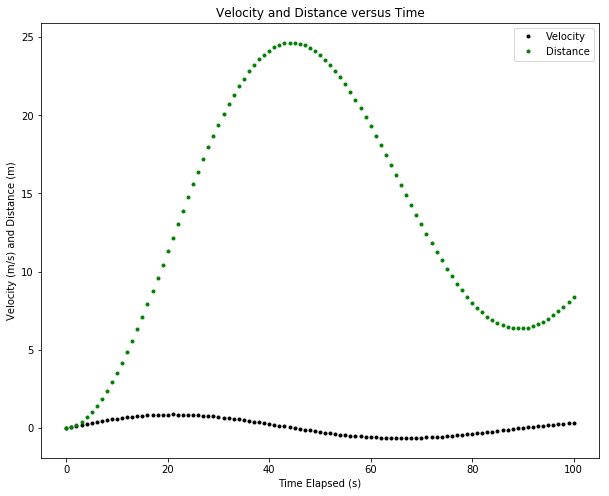

In [59]:
import numpy as np
import pylab as plt

%matplotlib inline

def f(time, velocityValues):
    return velocityValues[time]


dataSet = np.loadtxt ("velocities.txt", float)

timeValues  = dataSet[:,0]
velocityValues = dataSet[:,1]

N = len (timeValues) 
a = int (timeValues[0])
b = int (timeValues[N - 1])
h = 1

distanceTraveled = []

s = 0.5 * f(a, velocityValues) + 0.5 * f(b, velocityValues)
distanceTraveled.append (0)

for i in range (1, N):
    s += f (a + i * h, velocityValues)
    distanceTraveled.append (distanceTraveled[i - 1] + velocityValues[i] * h)

#final position based upon trapezoidal approximation
print ("Total Distance Traveled (by calculation):", s)

#final position based upon suming relative position with velocity multiplied by time step
#print ("Final position (by distanceTraveled[100]):", distanceTraveled[100])

#graph labels
pltTitle = "Velocity and Distance versus Time"
pltXLabel = "Time Elapsed (s)"
pltYLabel = "Velocity (m/s) and Distance (m)"

#graphs the data
plt.figure (figsize = (10, 8))
plt.plot (timeValues, velocityValues, "k.", label = "Velocity")
plt.plot (timeValues, distanceTraveled, "g.", label = "Distance")

#shows how the calculation for the total distance traveled matches up with the final value of the distanceTraveled data set
#plt.plot ([0, 101], [s,s], "k-")

plt.xlabel (pltXLabel)
plt.ylabel (pltYLabel)
plt.title (pltTitle)
plt.legend ()
plt.show ()


This graph shows an object's velocity (shown in black) and position (shown in green) over time. The objects position is based upon the amount of time that passes and the velocity of the object during that time. In this case we calculate the position of the object based upon the previous position plus the current velocity multiplied by the time between data points (one second). The final value of this distance is fairly close to the value determined by the trapezoidal method being 8.387578m while the trapezoidal approximation was 8.556232m. The trapezoidal integral approximation determined an approximate value for the area under the velocity versus time graph (or the distance traveled). The reason the integral of a velocity versus time graph is the distance is because  
$v = \frac{dx}{dt}$, so  

$\int v \ dt = \int dx$ or  

$\int v \ dt = x$.

This means that instead of having to calculate the distance traveled by summing at each step we can instead simply calculate the integral or area under the curve of our velocity versus time graph.